In [19]:
from utils import get_graph_paths, read_graph, parse_filename, DATE_FORMAT
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
dates = []
block_numbers = []
vertices_count = []
edges_count = []

for graph_path in tqdm(get_graph_paths()):
    block_number, graph_date = parse_filename(graph_path)

    dates.append(graph_date)
    block_numbers.append(block_number)

    graph = read_graph(graph_path)
    vertices_count.append(graph.number_of_nodes())
    edges_count.append(graph.number_of_edges())


100%|██████████| 1869/1869 [1:12:55<00:00,  2.34s/it]


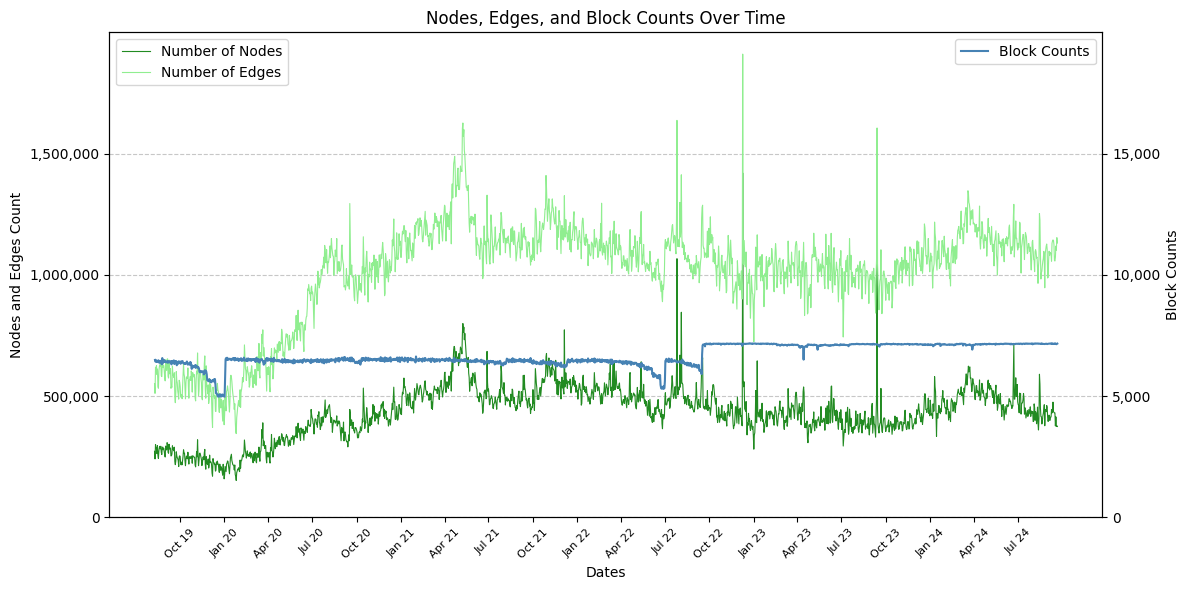

<Figure size 640x480 with 0 Axes>

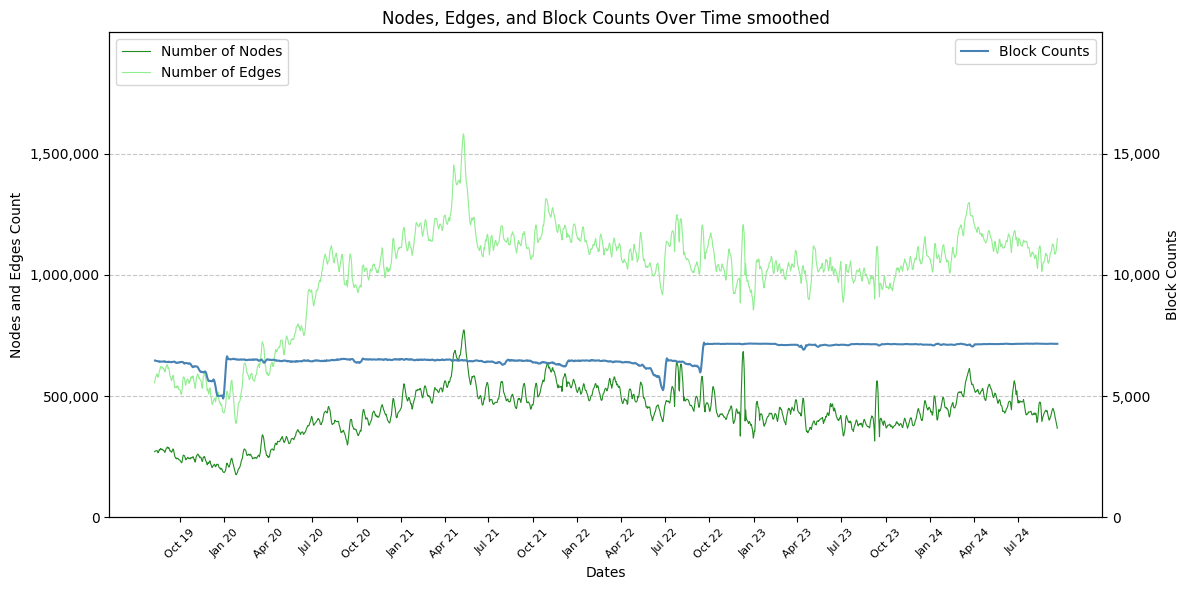

<Figure size 640x480 with 0 Axes>

In [61]:
import matplotlib.ticker as mticker
from scipy.signal import savgol_filter

formatter = mticker.FuncFormatter(lambda x, _: f"{int(x):,}")

vertices_ylim = 2e6
blocks_ylim = 2e4

blocks_count = np.diff(block_numbers)

# Set tick interval to the first of each month
date_index = pd.DatetimeIndex(dates)
monthly_ticks = date_index[date_index.is_quarter_start]
x_ticks = monthly_ticks
x_labels = monthly_ticks.strftime("%b %y")

for filter_name, filter_function in (
        ("", lambda y: y),
        (" smoothed", lambda y: savgol_filter(y, window_length=11, polyorder=2))
):
    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot nodes and edges on the left y-axis
    ax1.plot(dates, filter_function(vertices_count), label="Number of Nodes", linewidth=0.8, color="forestgreen")
    ax1.plot(dates, filter_function(edges_count), label="Number of Edges", linewidth=0.8, color="lightgreen")
    ax1.set_ylabel("Nodes and Edges Count")
    ax1.legend(loc="upper left")
    ax1.grid(axis="y", linestyle="--", alpha=0.7)

    # Customize x-axis
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels(x_labels, rotation=45, fontsize=8)
    ax1.set_xlabel("Dates")
    ax1.yaxis.set_major_formatter(formatter)
    ax1.set_ylim(0, vertices_ylim)
    ax1.set_yticks(np.arange(0, vertices_ylim, vertices_ylim / 4))

    # Create a second y-axis for block counts
    ax2 = ax1.twinx()
    ax2.plot(dates[1:], filter_function(blocks_count), color="steelblue", label="Block Counts")
    ax2.set_ylabel("Block Counts")
    ax2.legend(loc="upper right")
    ax2.yaxis.set_major_formatter(formatter)
    ax2.set_ylim(0, blocks_ylim)
    ax2.set_yticks(np.arange(0, blocks_ylim, blocks_ylim / 4))

    # Set the title
    plt.title("Nodes, Edges, and Block Counts Over Time" + filter_name)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    plt.clf()